<a href="https://colab.research.google.com/github/TranThiDieuHien/Cac-thuat-toan-toi-uu/blob/main/%C4%90%E1%BB%93_%C3%A1n_c%C3%A1c_thu%E1%BA%ADt_to%C3%A1n_t%E1%BB%91i_%C6%B0u_trong_ph%C3%A2n_t%C3%ADch_d%E1%BB%AF_li%E1%BB%87u1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})
import os
import string
from scipy.stats import norm

from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


## **PHÂN TÍCH MÔ TẢ**

HOTEL INFORMATION

In [2]:
#doc file
data = pd.read_csv("ThuaThienHue_Infor.csv")

In [3]:
data.sample(10)

,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
328,"06 Pham Van Dong, Hue Vietnam",3.0,36.0,NaN,NaN,Than Thien 2,$24,$11,$11 - $24,Which popular attractions are close to Than Th...,...,3,#74 of 183 B&Bs / Inns in Hue,35.0,NaN,16.0,Very good,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
41,"35 /12 Chu Van An Street 35/12 Chu Van An, Hue...",27.0,92.0,161.0,"English, Vietnamese",Hong Thien Ruby Hotel,$18,$12,$12 - $18,Which popular attractions are close to Hong Th...,...,634,#3 of 58 small hotels in Hue,5.0,3.0,160.0,Excellent,15,Family,26.0,https://www.tripadvisor.com/Hotel_Review-g2939...
128,"Thich Nu Dieu Khong 31, Hue Vietnam",0.0,0.0,NaN,"English, Vietnamese",Misa Tran Guesthouse,NaN,NaN,NaN,Which popular attractions are close to Misa Tr...,...,0,NaN,0.0,NaN,0.0,NaN,0,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
678,"17/34 Nguyen Tri Phuong Phu Hoi, Hue 530000 Vi...",12.0,93.0,45.0,"English, Japanese, Vietnamese",Sunny A Hotel,$18,$10,$10 - $18,Which popular attractions are close to Sunny A...,...,250,#21 of 209 hotels in Hue,45.0,20.0,98.0,Excellent,30,"Budget,Quiet",1.0,https://www.tripadvisor.com/Hotel_Review-g2939...
335,"13 Thich Nu Dieu Khong 13, Hue Vietnam",4.0,38.0,NaN,NaN,Th Dai Minh,$12,$11,$11 - $12,Which popular attractions are close to Th Dai ...,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
660,"53 Nguyen Cong Tru st, Hue Vietnam",26.0,91.0,8.0,"English, Vietnamese",Khe Sanh Homestay,$17,$10,$10 - $17,Which popular attractions are close to Khe San...,...,149,#9 of 267 Specialty lodging in Hue,45.0,20.0,134.0,Excellent,26,"Budget,Family",2.0,https://www.tripadvisor.com/Hotel_Review-g2939...
684,"1B Vo Thi Sau Street, Hue 08454 Vietnam",27.0,94.0,83.0,NaN,Ideal Hotel Hue,$55,$16,$16 - $55,Which popular attractions are close to Ideal H...,...,265,#101 of 209 hotels in Hue,35.0,30.0,191.0,Very good,35,Centrally Located,1.0,https://www.tripadvisor.com/Hotel_Review-g2939...
574,"5/28 Vo Thi Sau Street, Hue Vietnam",27.0,92.0,15.0,NaN,Cherry Hotel,$39,$21,$21 - $39,Which popular attractions are close to Cherry ...,...,60,#72 of 209 hotels in Hue,4.5,3.0,139.0,Excellent,Hue,"Great View,Family",13.0,https://www.tripadvisor.com/Hotel_Review-g2939...
552,"85 Vo Thi Sau street, Hue 530000 Vietnam",27.0,94.0,87.0,NaN,Flora Hotel,$24,$18,$18 - $24,Which popular attractions are close to Flora H...,...,41,#20 of 183 B&Bs / Inns in Hue,4.5,3.0,140.0,Excellent,Hue,"Centrally Located,Family",11.0,https://www.tripadvisor.com/Hotel_Review-g2939...
311,"106/11 Hai Trieu, Hue 530000 Vietnam",8.0,53.0,8.0,NaN,Forever Young Hostel,$14,$11,$11 - $14,Which popular attractions are close to Forever...,...,6,#65 of 267 Specialty lodging in Hue,45.0,NaN,22.0,Excellent,8,NaN,1.0,https://www.tripadvisor.com/Hotel_Review-g2939...


In [4]:
data.columns.values

array(['HAddress', 'HAttractions', 'HGFW', 'HImages', 'HLanguage',
       'HName', 'HPMax', 'HPMin', 'HPRange', 'HQuestions', 'HRImages',
       'HRNumber', 'HRank', 'HRankreview', 'HRating', 'HRestaurants',
       'HReview', 'HRoom', 'HStyles', 'HVideos', 'URL'], dtype=object)

Ta thấy được rằng số lượng khách sạn được đánh giá là Excellent và Very good là rất cao, chiếm số phần trăm lớn hơn gấp nhiều lần so với Average, Poor và Terrible.

=> Chứng tỏ độ thỏa mãn của khách hàng đối với đa số khách sạn ở Huế là rất cao

=> Khách sạn ở Huế phù hợp để được chọn là nơi nghỉ ngơi khi đi du lịch, công tác tại Huế.


In [5]:
new_data = data.dropna()
print(new_data)

                                              HAddress  HAttractions  HGFW  \
26                          46 Chu Van An, Hue Vietnam          27.0  92.0   
27                   4 Tran Quang Khai St, Hue Vietnam          28.0  93.0   
28   5 Lane 27 Nguyen Sinh Cung Street, Hue 530000 ...           3.0  81.0   
31            17 Nguyen Hue Street, Hue 008454 Vietnam           4.0  77.0   
33           50A Hung Vuong Street, Hue 530000 Vietnam           6.0  94.0   
..                                                 ...           ...   ...   
685               2 Luong The Vinh Street, Hue Vietnam          17.0  96.0   
688           16/7 Nguyen Cong Tru, Hue 530000 Vietnam          25.0  92.0   
689  Number 8 Lane 43 Nguyen Cong Tru Street, Hue 5...          25.0  91.0   
690             17 Nguyen Thai Hoc, Hue 530000 Vietnam          27.0  92.0   
691         4/34 Nguyen Tri Phuong Street, Hue Vietnam          14.0  97.0   

     HImages                             HLanguage  \
26      1

In [6]:
#Sap xep lai du lieu theo thu tu
index = []
print(len(new_data))
for i in range (1, len(new_data)+1):
    index.append(i)
new_data["Index"] = index
index1 = new_data.set_index("Index")
new_data = index1.sort_index()
new_data.head(10)

79


<ipython-input-6-6aa5121d2c50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Index"] = index


,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
Index,,,,,,,,,,,,,,,,,,,,,
1,"46 Chu Van An, Hue Vietnam",27.0,92.0,14.0,"English, Vietnamese",Hong Thien Backpackers Hotel,$18,$15,$15 - $18,Which popular attractions are close to Hong Th...,...,338,#6 of 75 hostels in Hue,4.5,2.0,160.0,Excellent,12,Budget,8.0,https://www.tripadvisor.com/Hotel_Review-g2939...
2,"4 Tran Quang Khai St, Hue Vietnam",28.0,93.0,193.0,"English, Vietnamese",Villa Hue,"$1,074",$29,$29 - $1074,Which popular attractions are close to Villa H...,...,369,#32 of 138 hotels in Hue,4.5,4.0,185.0,Excellent,34,"Quiet,Mid-range",22.0,https://www.tripadvisor.com/Hotel_Review-g2939...
3,"5 Lane 27 Nguyen Sinh Cung Street, Hue 530000 ...",3.0,81.0,62.0,"English, Vietnamese",Charming Riverside Hotel,$15,$13,$13 - $15,Which popular attractions are close to Charmin...,...,374,#6 of 138 hotels in Hue,5.0,2.0,24.0,Excellent,21,"Quiet,Charming",8.0,https://www.tripadvisor.com/Hotel_Review-g2939...
4,"17 Nguyen Hue Street, Hue 008454 Vietnam",4.0,77.0,398.0,"English, French, Chinese, Vietnamese",Mondial Hotel Hue,$49,$29,$29 - $49,Which popular attractions are close to Mondial...,...,467,#46 of 138 hotels in Hue,4.0,4.0,20.0,Very good,106,"Mid-range,Business",27.0,https://www.tripadvisor.com/Hotel_Review-g2939...
5,"50A Hung Vuong Street, Hue 530000 Vietnam",6.0,94.0,683.0,"English, Vietnamese",Vinpearl Hotel Hue,$104,$61,$61 - $104,Which popular attractions are close to Vinpear...,...,511,#1 of 138 hotels in Hue,5.0,5.0,74.0,Excellent,213,"Modern,Business",28.0,https://www.tripadvisor.com/Hotel_Review-g2939...
6,"29 Doi Cung Str, Hue Vietnam",28.0,94.0,295.0,Vietnamese,Midtown Hotel Hue,$48,$35,$35 - $48,Which popular attractions are close to Midtown...,...,518,#43 of 138 hotels in Hue,4.0,4.0,190.0,Very good,88,"River View,Modern",4.0,https://www.tripadvisor.com/Hotel_Review-g2939...
7,"7/64 Nguyen Cong Tru Phu Hoi, Hue 530000 Vietnam",25.0,91.0,59.0,Vietnamese,New Valentine Hotel,$19,$12,$12 - $19,Which popular attractions are close to New Val...,...,543,#26 of 138 hotels in Hue,4.5,2.0,134.0,Excellent,20,"Budget,Centrally Located",4.0,https://www.tripadvisor.com/Hotel_Review-g2939...
8,"59 Vo Thi Sau, Phu Hoi Ward, Hue 530000 Vietnam",27.0,93.0,111.0,"English, French, Vietnamese",Thanh Lich Hue Hotel,$45,$24,$24 - $45,Which popular attractions are close to Thanh L...,...,573,#9 of 138 hotels in Hue,4.5,3.0,145.0,Excellent,50,"City View,Family",27.0,https://www.tripadvisor.com/Hotel_Review-g2939...
9,"49 Le Loi Street, Hue 530000 Vietnam",26.0,94.0,382.0,Vietnamese,Century Riverside Hue Hotel,$57,$33,$33 - $57,Which popular attractions are close to Century...,...,604,#49 of 138 hotels in Hue,3.5,4.0,134.0,Very good,125,"Great View,River View",61.0,https://www.tripadvisor.com/Hotel_Review-g2939...


In [7]:
location = []
atc = new_data["HAttractions"]
gfw = new_data["HGFW"]
rn = new_data["HRestaurants"]
for i in range(1, len(new_data)+1):
    loca = atc[i] + gfw[i] + rn[i]
    location.append(loca)
new_data["Location"] = location
print(new_data[["HName", "Location"]].sample(10))

                                   HName  Location
Index                                             
23                        Hue Nino Hotel     262.0
48                           La Paix Hue      74.0
57                          Eva Homestay     301.0
1           Hong Thien Backpackers Hotel     279.0
56                       Thanh Noi Hotel     102.0
15                Lapochine Beach Resort       0.0
50     Stop and Go Boutique Homestay Hue     270.0
38                           Amona Hotel     256.0
41                         Nhu Phu Hotel     275.0
16                Hue Four Seasons Hotel     250.0


In [8]:
#Xoa ky tu "&" trong cot
new_data["HPMax"] = new_data["HPMax"].str.replace(r'\D', '')

<ipython-input-8-1c7ca86a766b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data["HPMax"] = new_data["HPMax"].str.replace(r'\D', '')


Phát biểu giả thuyết
- $$H_{0}: \mu_{0} = \mu_{1}$$
    Giá tiền tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống
- $$H_{1}: \mu_{0} <> \mu_{1}$$
    Giá tiền không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống

In [9]:
#Su dung thong ke t_test
for i in range(1, len(new_data)+1):
      new_data["HPMax"] = new_data["HPMax"].astype(int)
      new_data["Location"] = new_data["Location"].astype(int)
stat, p_value = stats.ttest_ind(new_data["HPMax"], new_data["Location"])
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          giá tiền khách sạn không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          giá tiền khách sạn tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn''')

Stat = -11.474055483278516 P_value = 1.7499803730252178e-22
Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          giá tiền khách sạn không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn


Nhận xét: Giá tiền khách sạn không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn.

HOTEL REVIEW COMMENTS

In [10]:
#doc file
data_comment = pd.read_csv("ThuaThienHue.csv")

In [11]:
data_comment.sample(4)

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url
9906,Ckecked in here for just one night as we had t...,Ann H,13.0,Dec-14,7.0,14-Dec,NaN,5.0,Eldora Hotel,"Greater London, United Kingdom",https://www.tripadvisor.com/Profile/andreahN38...,Just perfect,https://www.tripadvisor.com/Hotel_Review-g2939...
6342,Choosing Park View hotel from my friend advice...,jimmy t,1.0,Dec-13,2.0,13-Dec,Traveled on business,5.0,Park View Hue Hotel,"California City, California",https://www.tripadvisor.com/Profile/340jimmyt,Excellent Hotel,https://www.tripadvisor.com/Hotel_Review-g2939...
799,The staff was friendly and helpful whenever we...,DanielS362,2.0,Mar-13,1.0,13-Apr,Traveled with friends,5.0,Azerai La Residence Hue,"Vatican City, Italy",https://www.tripadvisor.com/Profile/DanielS362,A nice classy trip,https://www.tripadvisor.com/Hotel_Review-g2939...
12125,Jade Hotel is the place to stay while visiting...,Stephanie C,22.0,Dec-15,11.0,16-Jan,Trip type: Traveled as a couple,5.0,Jade Hotel,"Toronto, Canada",https://www.tripadvisor.com/Profile/yangfee66,A Wonderful Place To Stay In Hue,https://www.tripadvisor.com/Hotel_Review-g2939...


Kiểm tra các giá trị null

In [12]:
# Kiem tra cac gia tri null
data_comment.isnull().sum()

HComment               635
HCommenter             636
HContribute            650
HDate                  661
HThanks               3348
HTime                  633
HTravelType           3972
HTravelerRating        628
h_Hotel_name           620
h_reviewer_address    5266
h_reviewer_id          648
h_title_comment        635
h_url                    0
dtype: int64

Làm sạch dữ liệu

In [13]:
import re

def  clean_text(text):
    """
    Lam sach cac du lieu van ban
    * ky hieu
    * doi thanh lower case
    """
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(T))  )

    return text

In [14]:
data_comment.columns.values

array(['HComment', 'HCommenter', 'HContribute', 'HDate', 'HThanks',
       'HTime', 'HTravelType', 'HTravelerRating', 'h_Hotel_name',
       'h_reviewer_address', 'h_reviewer_id', 'h_title_comment', 'h_url'],
      dtype=object)

In [15]:
data_comment['HComment']= clean_text(data_comment['HComment'])

In [16]:
data_comment[["HComment", 'HTravelerRating']].sample(10)

,HComment,HTravelerRating
21757,on arrival at the waterland hotel we were in n...,5.0
5858,well as we arrived here the staff was really f...,5.0
4528,we stayed 2 nights in this hotelit was in a ve...,5.0
20509,great for those who want calm peace and relaxa...,5.0
5116,the location is very convenient although the h...,5.0
1194,walking distance to lots of bars and restauran...,5.0
8586,our family of 5 2 parents 3 young adult child...,5.0
6418,the hotel had the best location in the city ri...,5.0
13346,hue is a special place to visit it is indeed t...,5.0
12743,bright and helpful staff great location can w...,4.0


Đếm số lượng từng Rating

In [17]:
data_comment.HTravelerRating.value_counts()

5.0    15218
4.0     4433
3.0     1344
2.0      525
1.0      409
Name: HTravelerRating, dtype: int64

<Axes: xlabel='HTravelerRating', ylabel='count'>

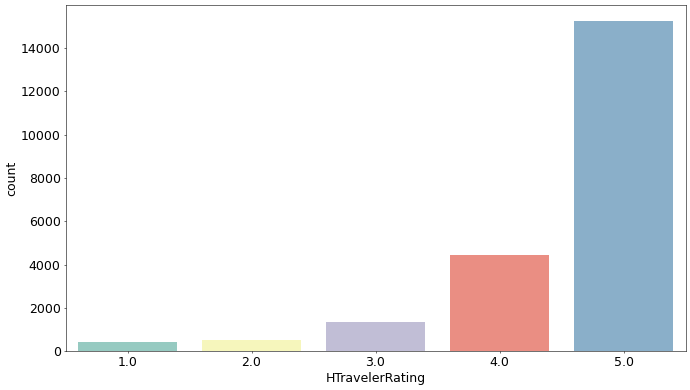

In [18]:
sns.countplot(data=data_comment,x='HTravelerRating', palette="Set3")

Nhận xét: Số lượng rating 5 sao cho các khách sạn ở Huế cao gấp nhiều lần tổng rating 1 đến 4 sao.

=> Điều này có nghĩa rằng các khách sạn ở Huế rất tốt và phù hợp với nhu cầu của khách hàng.



Ta có thể thấy rõ rằng biến mục tiêu (Rating) không cân bằng, vì có sự khác biệt rất lớn trong rating từ 1 và 5. Vì vậy, ở đây ta sẽ sử dụng một số kỹ thuật lấy mẫu để cân bằng các lớp này.

Lấy số lượng từ trong mỗi bài đánh giá

<ipython-input-19-dd1dd83a673a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(words_per_review,fit=norm, kde=False)


<Axes: >

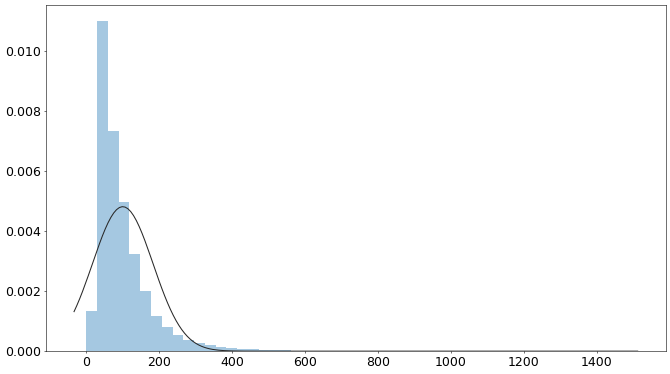

In [19]:
## Lấy số lượng từ bằng cách tách chúng theo dấu cách
words_per_review = [len(x.split(" ")) for x in data_comment['HComment']]
sns.distplot(words_per_review,fit=norm, kde=False)


Wordcloud của các từ phổ biến nhất

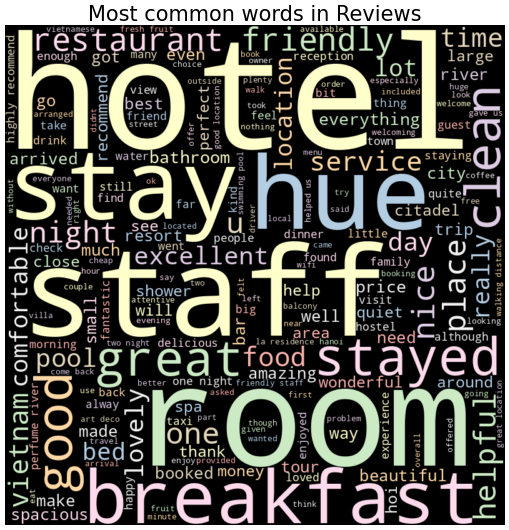

In [20]:
def wordCloud_generator(data_comment):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(data_comment.values))
    # plot the WordCloud image
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show()

wordCloud_generator(data_comment['HComment'])

## **PHÂN TÍCH DỮ LIỆU VÀ SỬ DỤNG CÁC THUẬT TOÁN TỐI ƯU**

## Xử lý trước văn bản


Bây giờ, ta sẽ xử lý trước các comment bằng cách sử dụng một số công cụ NLP như:
1. Chuyển thành lower case
2. Xoá dấu chấm câu
3. Xoá những từ dừng
4. Stemming
5. Bổ sung

In [23]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [24]:
punc=string.punctuation

stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

lemmatizer = WordNetLemmatizer()

def data_preprocessing(txt):

    #converting to lowercase
    txt=txt.lower()

    #Removing Punctuation
    txt="".join([x for x in txt if x not in punc])

    #Removing stopwords
    txt=" ".join([word for word in str(txt).split() if word not in stop_words])

    #Stemming
    txt = " ".join([stemmer.stem(word) for word in txt.split()])

    #Lemmatization
    txt = " ".join([lemmatizer.lemmatize(word) for word in txt.split()])

    return txt

data_comment['text'] = data_comment['HComment'].apply(data_preprocessing)

In [25]:
data_rating = data_comment[["HComment", 'HTravelerRating', 'text']]

In [26]:
# Xoa cac hang co chua gia tri null
data_rating = data_rating[data_rating['HComment'].notna()]
data_rating = data_rating[data_rating['HTravelerRating'].notna()]
data_rating = data_rating[data_rating['text'].notna()]

In [27]:
#Xem tap du lieu moi
data_rating

,HComment,HTravelerRating,text
1,fantastic room excellent staff and fabulous ex...,5.0,fantast room excel staff fabul excurs outsid c...
2,we stayed at azerai la residence hue during th...,5.0,stay azerai la resid hue tet holiday group 3 f...
3,im just back from two nights at the azerai la ...,5.0,im back two night azerai la resid delight stay...
4,we stayed here for four nights in april 2021 o...,5.0,stay four night april 2021 obvious covid pande...
5,we spent a few days exploring hu and we were v...,5.0,spent day explor hu happi everyth hotel comfor...
...,...,...,...
22552,we were pleased with the room compared to othe...,4.0,plea room compar other price rang help staff
22553,we were met by the owner in the street he conv...,4.0,met owner street convinc u choos hotel disappo...
22554,stayed for two nights and chose the penthouse ...,4.0,stay two night chose penthous option fun binh ...
22555,guidebook recommendation we got a big airy roo...,3.0,guidebook recommend got big airi room top floo...


## Dự đoán mức độ hài lòng đặt phòng khách sạn qua Rating từ 1 đến 5 sao

Thư viện: [machine_learning, scikit-learn, logistic_regression, kNN, decision_tree, random_forest, adaboost, naive_bayes, quadratic_discriminant_analysis, gaussian_process,,...]

Chúng ta sẽ xem xét việc áp dụng các thuật toán Machine Learning cho tập dữ liệu lấy từ TripAdvisor để phân loại xem xét, phân loại và dự đoán mức độ hài lòng đặt phòng khách sạn ở Thừa Thiên Huế.

Ta sẽ sử dụng thuật toán scikit-learn để xử lý tập dữ liệu này.

## Tập dữ liệu

# Chi tiết về tập dữ liệu

Đặc điểm của tập dữ liệu: Đa biến

Đặc điểm thuộc tính: Số nguyên

Nhiệm vụ liên quan: Phân loại

Số lượng instance: 22556

Số thuộc tính: 3

Khu vực: Các khách sạn ở Thừa Thiên

# Thông tin thuộc tính

1.HComment: Bình luận, đánh giá của khách hàng

2.HTravelerRating: 1- 5 sao

3.text: HComment đã chỉnh sửa

Ta sẽ sử dụng HTravelerRating và text cho phần phân tích dữ liệu và dự báo này

## Vectơ hóa văn bản đầu vào

Bây giờ chúng ta sẽ vectơ rating bằng cách sử dụng điểm TF-IDF và chúng ta sẽ sử dụng toarray () để chuyển đổi ma trận thưa thớt kết quả thành ma trận dày đặc.




In [28]:
### Tạo một đối tượng của class TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=400, min_df=0.05, max_df=0.9)
tfidf = tfidfconverter.fit_transform(data_rating['text']).toarray()

## Chia thành các training sets và test sets

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf,data_rating['HTravelerRating'],test_size=0.2,random_state=42)

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=43, class_weight={4: 2}, max_iter=800, n_jobs=-1)
lr_model.fit(X_train, y_train)
lr_accuracy = lr_model.score(X_test, y_test)
print(f"Accuracy of Logistic Regression Classifier is:{lr_accuracy}")

Accuracy of Logistic Regression Classifier is:0.691062471500228


## Sử dụng các thuật toán tối ưu để cải thiện (ADAM, MBGD)

# Sử dụng thuật toán tối ưu MBGD Mini-Batch Gradient Descent

In [80]:
# Hàm tính toán giá trị dự đoán (hypothesis) cho các đầu vào X dựa trên các tham số theta.
def hypothesis(X, theta):
    return np.dot(X, theta)

# Hàm tính toán gradient của hàm lỗi theo theta
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad

# Hàm tính toán lỗi cho các giá trị hiện tại của theta
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

# Hàm tạo ra một danh sách chứa các mini-batch
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# Hàm thực hiện thuật toán gradient descent theo mini-batch
def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))

    return theta, error_list

In [ ]:
#Gọi hàm gradientDescent() để tính toán các tham số mô hình (theta)
theta, error_list = gradientDescent(X_train, y_train.to_numpy().reshape(-1, 1))
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# Trực quan hóa gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

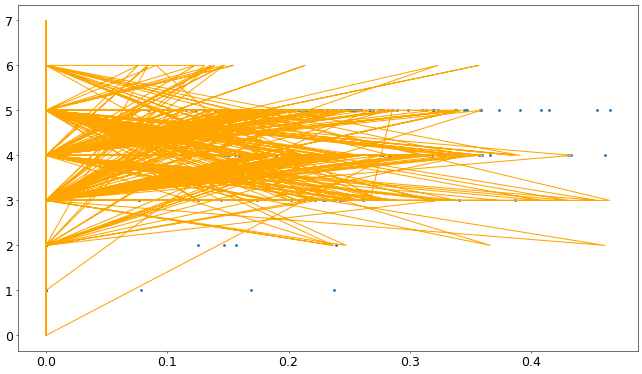

In [82]:
# Dự đoán đầu ra cho X_test
y_pred = hypothesis(X_test, theta).astype(int)
plt.scatter(X_test[:, 1], y_test[:, ], marker='.')
plt.plot(X_test[:, 1], y_pred, color='orange')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score
# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =', accuracy)

Accuracy = 0.27975376196990426


# Sử dụng thuật toán tối ưu Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Xác định kiến trúc mô hình của bạn
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=179))    #Chiều ở đây là 179
model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình của bạn và chỉ định bộ tối ưu hóa Adam
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [113]:
model.fit(X_train, y_train, epochs=10, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/10
439/439 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0186 - val_loss: 0.0000e+00 - val_accuracy: 0.0187
Epoch 2/10
439/439 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0186 - val_loss: 0.0000e+00 - val_accuracy: 0.0187
Epoch 3/10
439/439 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0186 - val_loss: 0.0000e+00 - val_accuracy: 0.0187
Epoch 4/10
439/439 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0186 - val_loss: 0.0000e+00 - val_accuracy: 0.0187
Epoch 5/10
439/439 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0186 - val_loss: 0.0000e+00 - val_accuracy: 0.0187
Epoch 6/10
439/439 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0186 - val_loss: 0.0000e+00 - val_accuracy: 0.0187
Epoch 7/10
439/439 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0

In [114]:
from sklearn.utils import resample
from collections import Counter


print("Trước khi lấy mẫu ngược:-")
print(Counter(y_train))


Trước khi lấy mẫu ngược:-
Counter({5.0: 12160, 4.0: 3574, 3.0: 1080, 2.0: 402, 1.0: 327})


## Lấy mẫu ngược bằng ADASYN

Vì biến mục tiêu của ta không cân bằng, ta sẽ sử dụng thuật toán ADASYN để lấy mẫu thêm cho các lớp thiểu số. Điều này giúp tăng accuracy.

In [118]:
# Su dung ADASYN de lay mau
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)
print("Sau khi lấy mẫu ngược:-")
print(Counter(y_train))
print(Counter(y_test))

Sau khi lấy mẫu ngược:-
Counter({5.0: 12160, 1.0: 12160, 2.0: 12078, 3.0: 11989, 4.0: 11795})
Counter({3.0: 3142, 5.0: 3058, 2.0: 3050, 1.0: 3047, 4.0: 2990})


In [119]:
model.fit(X_train, y_train, epochs=10, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/10
1505/1505 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2021 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 2/10
1505/1505 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2021 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 3/10
1505/1505 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2021 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 4/10
1505/1505 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2021 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 5/10
1505/1505 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2021 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 6/10
1505/1505 [==============================] - 5s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2021 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 7/10
1505/1505 [==============================] - 3s 2ms/step - loss: 0.0000e+00 -